In [5]:
import json

# Load image characteristics
annot_path = 'annotation/validation/1008/4219909195.json'
with open(annot_path, 'r') as f:
    annot = json.load(f)
print('annot.keys():', annot.keys())
print('subject/objects:', annot['subject/objects'])
print('frame_count: ', annot['frame_count'])
print('width:', annot['width'], 'height:', annot['height'])
    
# Load human pose
human_pose_path = 'human_poses/1008/4219909195.json'
with open(human_pose_path, 'r') as f:
    human_pose = json.load(f)
print('human_pose.keys():', human_pose.keys())

annot.keys(): dict_keys(['version', 'video_id', 'video_hash', 'video_path', 'frame_count', 'fps', 'width', 'height', 'subject/objects', 'trajectories', 'relation_instances'])
subject/objects: [{'tid': 0, 'category': 'adult'}, {'tid': 1, 'category': 'child'}, {'tid': 2, 'category': 'adult'}, {'tid': 3, 'category': 'sofa'}]
frame_count:  1003
width: 640 height: 480
human_pose.keys(): dict_keys(['0', '1', '2'])


In [6]:
import numpy as np
HEATMAP_SIZE = 128
skeletons = [[16, 14], [14, 12], [17, 15], [15, 13], [12, 13], [6, 12], \
             [7, 13], [6, 7], [6, 8], [7, 9], [8, 10], [9, 11], [2, 3], [1, 2], \
             [1, 3], [2, 4], [3, 5], [4, 6], [5, 7]]

orig_width, orig_height = annot['width'], annot['height']
# n_person = annot['subject/objects']
scale_x = HEATMAP_SIZE / orig_width
scale_y = HEATMAP_SIZE / orig_height

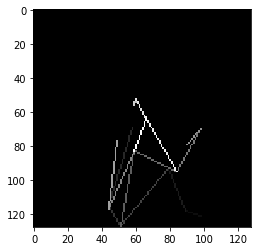

In [7]:
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

ret = np.zeros((HEATMAP_SIZE, HEATMAP_SIZE))

pose_frame = np.array(human_pose['0']['0'])
cur_kps = np.zeros((17, 2), dtype=np.int)
cur_kps[:, 0] = (pose_frame[:, 0] * scale_x).astype(np.int)
cur_kps[:, 1] = (pose_frame[:, 1] * scale_y).astype(np.int)

for j, sk in enumerate(skeletons):
    sk0 = sk[0] - 1
    sk1 = sk[1] - 1
#     if vis[sk0]>0 and vis[sk1]>0:
    ret = cv2.line(ret, tuple(cur_kps[sk0]), tuple(cur_kps[sk1]), 0.05*(j+1), 1)
#     ret = cv2.line(ret, tuple(cur_kps[sk0]), tuple(cur_kps[sk1]), 1, 1)

plt.imshow(ret, cmap='gray')
plt.show()

In [8]:
len(skeletons)

19

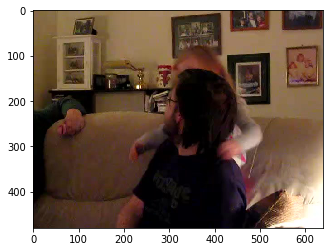

In [9]:
from matplotlib import pyplot as plt
%matplotlib inline
img_path = 'frames/1008/4219909195/4219909195_000001.jpg'
img = plt.imread(img_path)
plt.imshow(img)
plt.show()